In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sentence_transformers import SentenceTransformer, util

In [8]:
with open('gdpr_articles_baseline.json', 'r', encoding='utf-8') as f:
    gdpr_data = json.load(f)

# Flatten the structure
flattened = []
for article in gdpr_data:
    for section in article['sections']:
        for sec_num, sec_text in section.items():
            flattened.append({
                "article_number": article['article_number'],
                "article_title": article['article_title'],
                "section_number": sec_num,
                "section_text": sec_text
            })

gdpr_df = pd.DataFrame(flattened)
gdpr_df.head()

,article_number,article_title,section_number,section_text
0,1,Subject-matter and objectives,1.,This Regulation lays down rules relating to th...
1,1,Subject-matter and objectives,2.,This Regulation protects fundamental rights an...
2,1,Subject-matter and objectives,3.,The free movement of personal data within the ...
3,2,Material scope,1.,This Regulation applies to the processing of p...
4,2,Material scope,2.,This Regulation does not apply to the processi...


In [9]:
# Filtering only articles 5-7 
gdpr_df = gdpr_df.loc[gdpr_df['article_number'].isin([5, 6, 7])]
gdpr_df

,article_number,article_title,section_number,section_text
49,5,Principles relating to processing of personal ...,1.,"Personal data shall be: processed lawfully, fa..."
50,5,Principles relating to processing of personal ...,2.,"processed lawfully, fairly and in a transparen..."
51,5,Principles relating to processing of personal ...,3.,"collected for specified, explicit and legitima..."
52,5,Principles relating to processing of personal ...,4.,"adequate, relevant and limited to what is nece..."
53,5,Principles relating to processing of personal ...,5.,"accurate and, where necessary, kept up to date..."
54,5,Principles relating to processing of personal ...,6.,kept in a form which permits identification of...
55,5,Principles relating to processing of personal ...,7.,processed in a manner that ensures appropriate...
56,5,Principles relating to processing of personal ...,8.,"The controller shall be responsible for, and b..."
57,6,Lawfulness of processing,1.,Processing shall be lawful only if and to the ...
58,6,Lawfulness of processing,2.,the data subject has given consent to the proc...


In [10]:
with open("ikea_privacy_policy.json", encoding="utf-8") as f:
    ikea_data = json.load(f)

ikea_df = pd.DataFrame(ikea_data)
ikea_df

,section_title,section_text
0,1. Who is the responsible controller for the d...,The party responsible for processing data (“co...
1,2. What data is being processed and from which...,We process the data that we receive from you i...
2,3. For which purpose and for how long is the d...,We process your data for specific purposes an...
3,4. On which legal basis is personal data being...,4.1 On grounds of consent – Art 6 para 1 lit a...
4,5. Who will be receiving your data?,Your data will be passed on to the following r...
5,6. Are you obliged to provide data?,You will need to give us your data for us to b...
6,7. Is there automated decision-making includin...,We will not use automated decision-making acco...
7,8. Your rights in processing your personal data,You may (i) demand disclosure on whether and w...


In [11]:
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
ikea_embeddings = model.encode(ikea_df["section_text"].tolist(), convert_to_tensor=True)
gdpr_embeddings = model.encode(gdpr_df["section_text"].tolist(), convert_to_tensor=True)


In [13]:
cos_sim_matrix = util.cos_sim(ikea_embeddings, gdpr_embeddings).cpu().numpy()

# Build similarity DataFrame
sim_df = pd.DataFrame(
    cos_sim_matrix,
    index=ikea_df["section_title"],
    columns=[f"Art. {row.article_number}-{row.section_number}" for _, row in gdpr_df.iterrows()]
)


In [15]:
sim_df

,Art. 5-1.,Art. 5-2.,Art. 5-3.,Art. 5-4.,Art. 5-5.,Art. 5-6.,Art. 5-7.,Art. 5-8.,Art. 6-1.,Art. 6-2.,...,Art. 6-12.,Art. 6-13.,Art. 6-14.,Art. 6-15.,Art. 6-16.,Art. 6-17.,Art. 7-1.,Art. 7-2.,Art. 7-3.,Art. 7-4.
section_title,,,,,,,,,,,,,,,,,,,,,
1. Who is the responsible controller for the data processing and whom you may contact?,0.257224,0.213051,0.138168,0.205891,0.240278,0.208943,0.227287,0.246371,0.261289,0.282306,...,0.250797,0.200064,0.294184,0.159536,0.112370,0.080780,0.306141,0.209066,0.189841,0.241574
2. What data is being processed and from which sources do these stem from?,0.404369,0.294764,0.219224,0.250250,0.287415,0.370119,0.300780,0.164135,0.228211,0.382334,...,0.335754,0.428162,0.407551,0.373597,0.159517,0.139545,0.319179,0.242864,0.249816,0.271056
3. For which purpose and for how long is the data being processed?,0.677006,0.526309,0.488485,0.512642,0.507410,0.677426,0.586262,0.225294,0.505885,0.641052,...,0.635236,0.706905,0.562108,0.612109,0.502407,0.275925,0.524389,0.472203,0.489171,0.392522
4. On which legal basis is personal data being processed?,0.554331,0.424058,0.316717,0.388963,0.388092,0.478369,0.487596,0.299232,0.517118,0.584450,...,0.530167,0.413771,0.397027,0.357036,0.299253,0.362024,0.533030,0.623094,0.648719,0.525395
5. Who will be receiving your data?,0.414231,0.417125,0.219479,0.320561,0.327749,0.415116,0.464685,0.275941,0.330275,0.471202,...,0.386384,0.371793,0.419669,0.329830,0.243444,0.297163,0.387276,0.393481,0.348014,0.346023
6. Are you obliged to provide data?,0.346663,0.304157,0.215242,0.315349,0.274360,0.370693,0.325903,0.219471,0.274074,0.406899,...,0.278319,0.348505,0.352224,0.269763,0.212527,0.235474,0.361545,0.296134,0.267018,0.284305
7. Is there automated decision-making including profiling?,0.338309,0.248000,0.242386,0.281925,0.333447,0.295029,0.265202,0.091091,0.265838,0.364252,...,0.332294,0.338986,0.311801,0.309150,0.332140,0.202008,0.314543,0.318810,0.324979,0.324672
8. Your rights in processing your personal data,0.503500,0.443349,0.276374,0.238047,0.395305,0.483505,0.470275,0.233828,0.326760,0.508416,...,0.444061,0.406353,0.380960,0.388545,0.218278,0.337084,0.388264,0.433164,0.459108,0.365636


In [16]:
ikea_df = ikea_df.reset_index(drop=True)
sim_df = sim_df.reset_index(drop=True)

In [18]:
ikea_df["semantic_similarity_score"] = sim_df.max(axis=1)
ikea_df["best_match_gdpr_section"] = sim_df.idxmax(axis=1)

# View results
print(ikea_df[["section_title", "semantic_similarity_score", "best_match_gdpr_section"]].sort_values(by="semantic_similarity_score", ascending=False))

                                       section_title  \
2  3. For which purpose and for how long is the d...   
3  4. On which legal basis is personal data being...   
7    8. Your rights in processing your personal data   
4                5. Who will be receiving your data?   
1  2. What data is being processed and from which...   
5                6. Are you obliged to provide data?   
6  7. Is there automated decision-making includin...   
0  1. Who is the responsible controller for the d...   

   semantic_similarity_score best_match_gdpr_section  
2                   0.706905              Art. 6-13.  
3                   0.648719               Art. 7-3.  
7                   0.508416               Art. 6-2.  
4                   0.471202               Art. 6-2.  
1                   0.428162              Art. 6-13.  
5                   0.406899               Art. 6-2.  
6                   0.364252               Art. 6-2.  
0                   0.306141               Art. 7-1.  


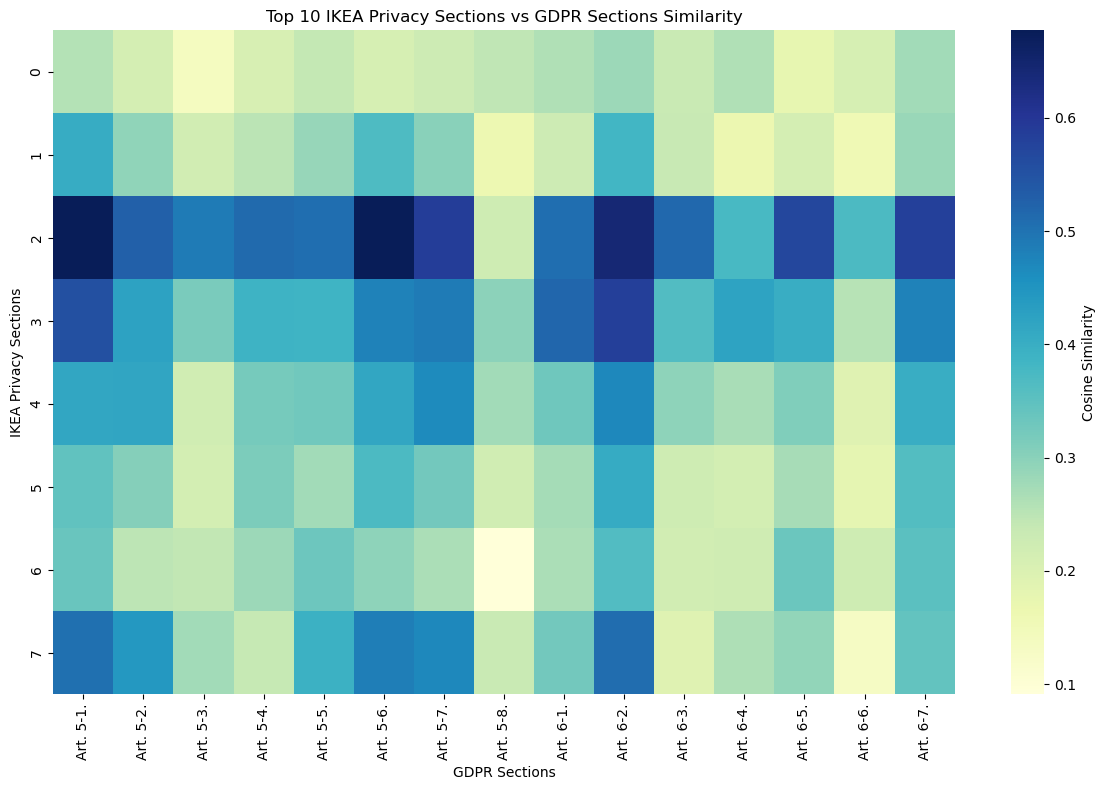

In [19]:
# Similarity matrix for top 10 IKEA sections
plt.figure(figsize=(12, 8))
sns.heatmap(sim_df.iloc[:10, :15], cmap="YlGnBu", cbar_kws={'label': 'Cosine Similarity'})
plt.title("Top 10 IKEA Privacy Sections vs GDPR Sections Similarity")
plt.xlabel("GDPR Sections")
plt.ylabel("IKEA Privacy Sections")
plt.tight_layout()
plt.show()